In [6]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D

In [7]:
def conv2D(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    rows, cols = image.shape

    conv_image = np.zeros(shape=(rows, cols), dtype=np.float32)
    padded_image = np.zeros(shape=(rows + 2, cols + 2))
    padded_image[1:-1, 1:-1] = image

    padded_rows, padded_cols = padded_image.shape

    for i_out, i in enumerate(range(1, padded_rows - 1)):
        for j_out, j in enumerate(range(1, padded_cols - 1)):
            image_slice = padded_image[i-1: i+2, j-1: j+2]
            conv_image[i_out, j_out] = np.sum(kernel * image_slice)

    return conv_image

Prvious shape: (4, 4) current shape: (4, 4)
Conved Image:
[[10. 18. 24. 18.]
 [27. 45. 54. 39.]
 [51. 81. 90. 63.]
 [42. 66. 72. 50.]]
Conved Image TF:
[[10. 18. 24. 18.]
 [27. 45. 54. 39.]
 [51. 81. 90. 63.]
 [42. 66. 72. 50.]]


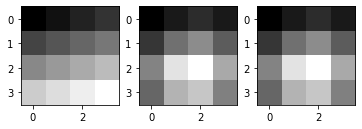

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image = np.arange(16)
image = image.reshape((4, 4)).astype(np.float32)
kernel = np.ones(shape=(3, 3))

conv_image = conv2D(image, kernel)

print(f"Prvious shape: {image.shape} current shape: {conv_image.shape}")
print(f"Conved Image:\n{conv_image.squeeze()}")

layer = Conv2D(filters=1, kernel_size=(3, 3), strides=1, padding='same')
layer.build((4, 4, 1))
W, b = layer.get_weights()
layer.set_weights([np.ones_like(W), np.zeros_like(b)])
conv_image_tf = layer(image.reshape((1, 4, 4, 1))).numpy()
print(f"Conved Image TF:\n{conv_image_tf.squeeze()}")
not_equals = (conv_image.flatten() != conv_image_tf.flatten())
# assert np.allclose(conv_image.flatten(), conv_image_tf.flatten())

fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].imshow(image, cmap="gray")
axs[1].imshow(conv_image, cmap="gray")
axs[2].imshow(conv_image_tf.squeeze(), cmap="gray")
plt.show()